In [42]:
from zipfile import ZipFile as zp
import pandas as pd

dz = zp("/content/churn.zip")
data = pd.read_csv(dz.open("WA_Fn-UseC_-Telco-Customer-Churn.csv"))
data_copy = data.copy()

data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:
data.drop(columns = "customerID", axis = 1, inplace = True)

In [45]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data['TotalCharges'].dtypes

dtype('float64')

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [47]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


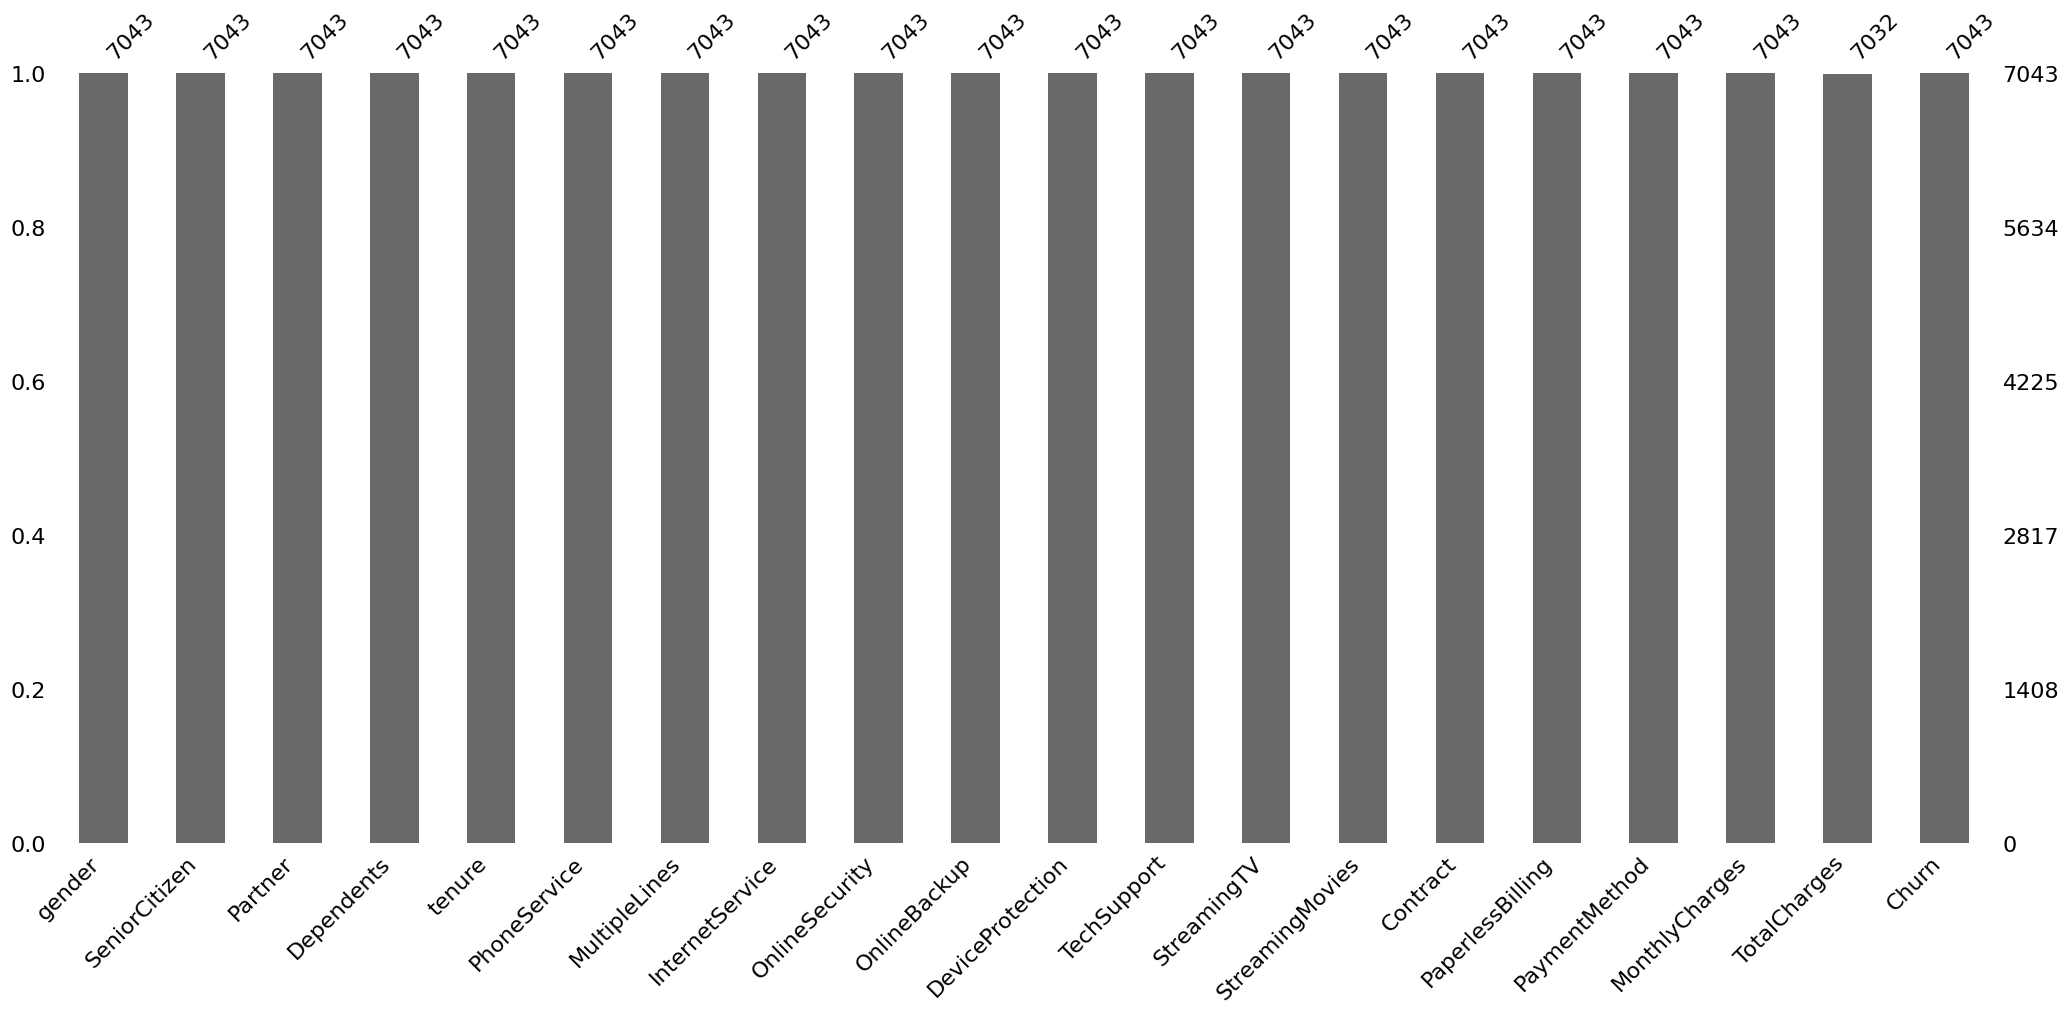

In [48]:
#visualize null values
import missingno as ms
import matplotlib.pyplot as plt

ms.bar(data)
plt.show()

In [49]:
data.fillna(data['TotalCharges'].median(), inplace = True)
data['TotalCharges'].isna().sum()

0

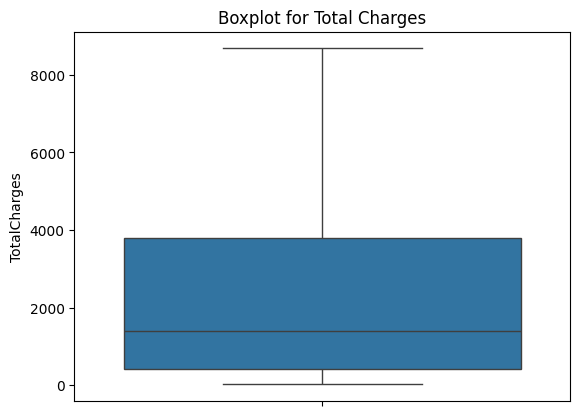

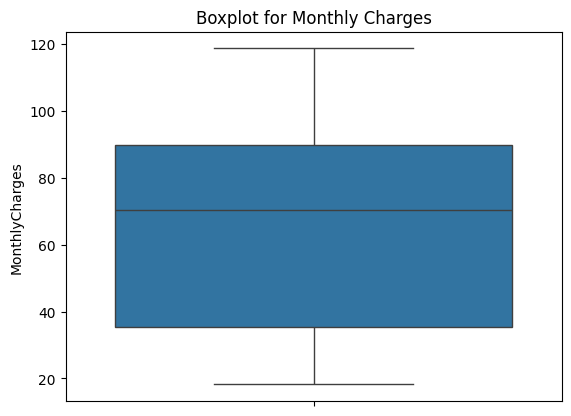

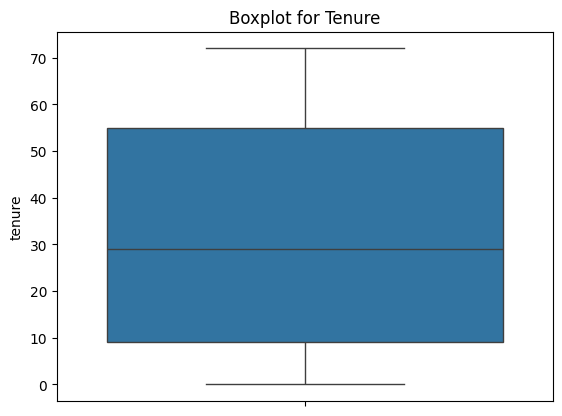

In [50]:
#check outliers
import seaborn as sns

sns.boxplot(data['TotalCharges'])
plt.title("Boxplot for Total Charges")
plt.show()

sns.boxplot(data['MonthlyCharges'])
plt.title("Boxplot for Monthly Charges")
plt.show()

sns.boxplot(data['tenure'])
plt.title("Boxplot for Tenure")
plt.show()

we don't have any outliers

In [51]:
data['Churn'] = [1 if i == 'Yes' else 0 for i in data['Churn']]
data['Churn'].unique()

array([0, 1])

In [52]:
#Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var = data.select_dtypes(include = 'object').columns
data.update(data[var].apply(le.fit_transform))

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [53]:
#Split data
from sklearn.model_selection import train_test_split

y = data['Churn']
x = data.drop(columns = 'Churn', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [54]:
#Standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#we will use lazypredict library for finding the best ml algorithm

In [56]:
pip install lazypredict

In [58]:
from lazypredict.Supervised import LazyClassifier

lazy_c = LazyClassifier()
models, preds = lazy_c.fit(x_train, x_test, y_train, y_test)
print(models.sort_values(by = 'Accuracy', ascending = False))

 84%|████████▍ | 27/32 [00:22<00:05,  1.08s/it]/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
 97%|█████████▋| 31/32 [00:24<00:00,  1.28it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
100%|██████████| 32/32 [00:25<00:00,  1.26it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.82               0.74     0.74      0.82   
CalibratedClassifierCV             0.82               0.74     0.74      0.82   
RidgeClassifier                    0.82               0.73     0.73      0.81   
RidgeClassifierCV                  0.82               0.73     0.73      0.81   
LinearDiscriminantAnalysis         0.82               0.74     0.74      0.81   
LogisticRegression                 0.82               0.74     0.74      0.81   
SVC                                0.81               0.71     0.71      0.80   
AdaBoostClassifier                 0.81               0.72     0.72      0.80   
NuSVC                              0.80               0.68     0.68      0.79   
LGBMClassifier                     0.80               0.71     0.71      0.79   
RandomForestClassifier      

In [73]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
#MODEL building with hyperparameter tuning

models = ['LinearSVC', 'Random Forest', "LGBM", "XGBM"]
classes = [LinearSVC(random_state = 0, C = 0.1, penalty = 'l1', dual = False),
           RandomForestClassifier(random_state = 0, max_depth = 10, min_samples_split = 2, n_estimators = 2000),
           LGBMClassifier(random_state = 0, learning_rate = 0.01, max_depth = 4, n_estimators = 1000, subsample = 0.5),
           XGBClassifier(random_state = 0, learning_rate = 0.001, max_depth = 4, n_estimators = 2000, subsample = 0.8)]


# def f(model):
#   model.fit(x_train, y_train)
#   return model

def score(model):
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  acs = accuracy_score(y_test, pred)
  return acs * 100

accuracy = [ ]
for i in classes:
  accuracy.append(score(i))

print(accuracy)

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [69]:
a = list(zip(models, accuracy))
result = pd.DataFrame(a, columns = ['Model', 'Accuracy'])
print(result)

           Model  Accuracy
0      LinearSVC     82.19
1  Random Forest     80.55
2           LGBM     80.41
3           XGBM     80.70


In [71]:
#other metrics for LinearSVC

linearsvc = LinearSVC(random_state = 0, C = 0.1, penalty = 'l1', dual = False)
linearsvc.fit(x_train, y_train)
linearsvc_pred = linearsvc.predict(x_test)

cr = classification_report(y_test, linearsvc_pred)
print(f"Classification Report: \n {cr}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



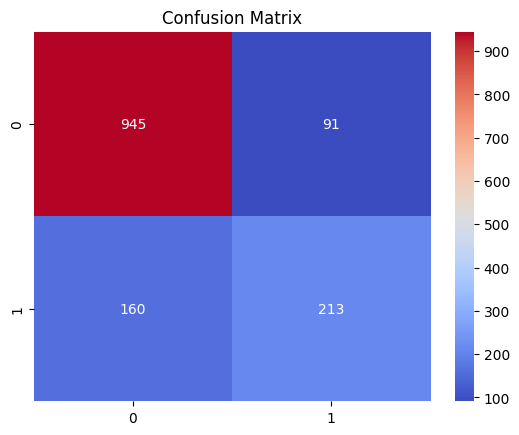

In [72]:
#Confusion Matrix
cm = confusion_matrix(y_test, linearsvc_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.title("Confusion Matrix")
plt.show()

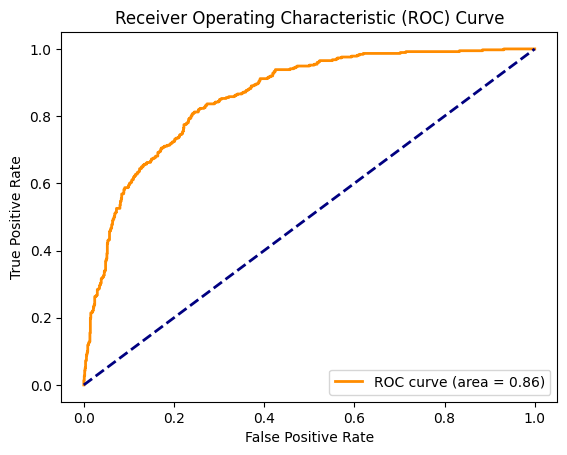

In [75]:
#ROC AUC Curve

y_proba = linearsvc.decision_function(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()